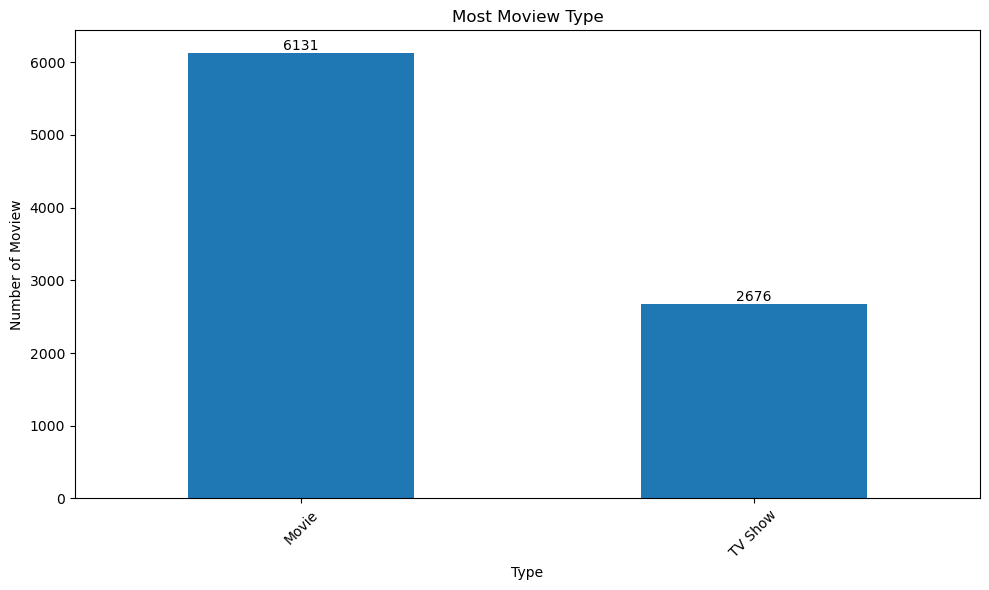

In [4]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt

# Declaration
# Exploratory Data Analysis (EDA) - Most Moview Type
df = pd.read_csv("netflix_titles.csv")

# Dataset
top_context = df['type'].value_counts()
    
# Bar Chart
plt.figure(figsize=(10, 6))
ax = top_context.plot(kind='bar')
# Add label
for i, value in enumerate(top_context):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.title("Most Moview Type")
plt.xlabel("Type")
plt.ylabel("Number of Moview")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

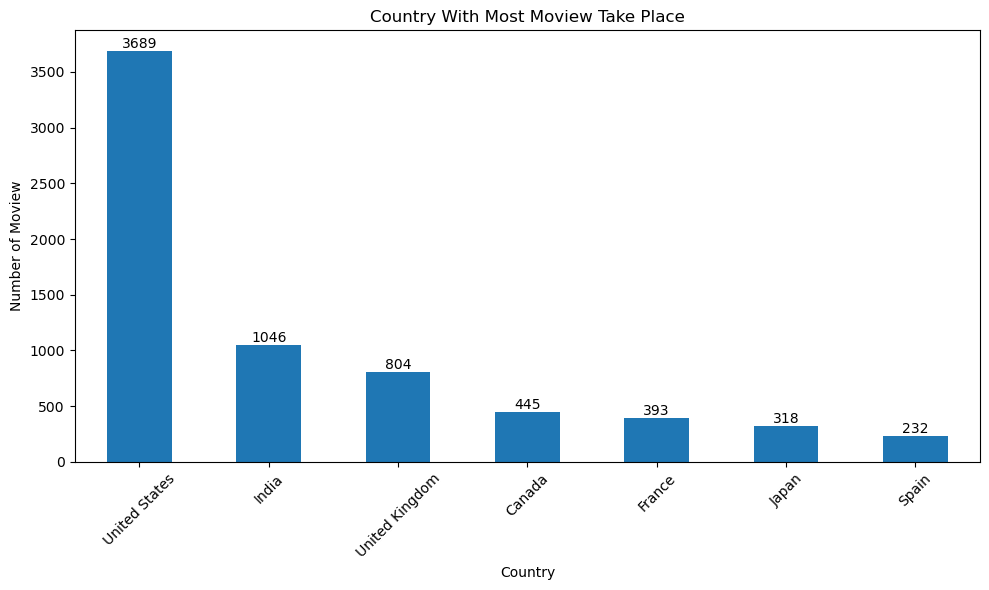

In [2]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt

# Declaration
# Exploratory Data Analysis (EDA) - Country With Most Moview Take Place
df = pd.read_csv("netflix_titles.csv")

# Dataset
country_list = df['country'].dropna().str.split(', ')
country_counts = pd.Series([country for sublist in country_list for country in sublist])
top_context = country_counts.value_counts().head(7)
    
# Bar Chart
plt.figure(figsize=(10, 6))
ax = top_context.plot(kind='bar')
# Add label
for i, value in enumerate(top_context):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.title("Country With Most Moview Take Place")
plt.xlabel("Country")
plt.ylabel("Number of Moview")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

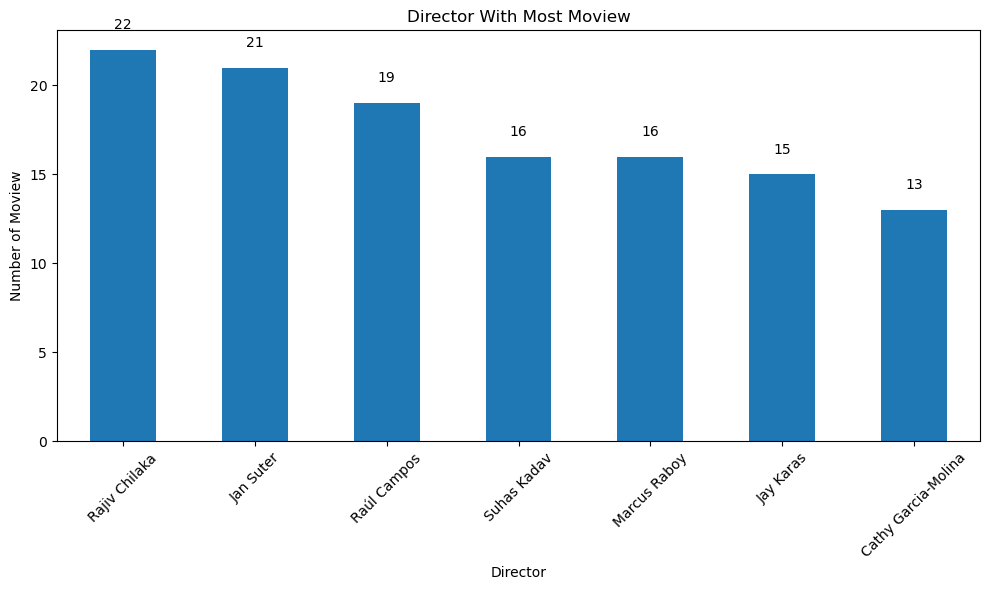

In [2]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt

# Declaration
# Exploratory Data Analysis (EDA) - Director With Most Moview 
df = pd.read_csv("netflix_titles.csv")

# Dataset
country_list = df['director'].dropna().str.split(', ')
country_counts = pd.Series([country for sublist in country_list for country in sublist])
top_context = country_counts.value_counts().head(7)
    
# Bar Chart
plt.figure(figsize=(10, 6))
ax = top_context.plot(kind='bar')
# Add label
for i, value in enumerate(top_context):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.title("Director With Most Moview")
plt.xlabel("Director")
plt.ylabel("Number of Moview")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

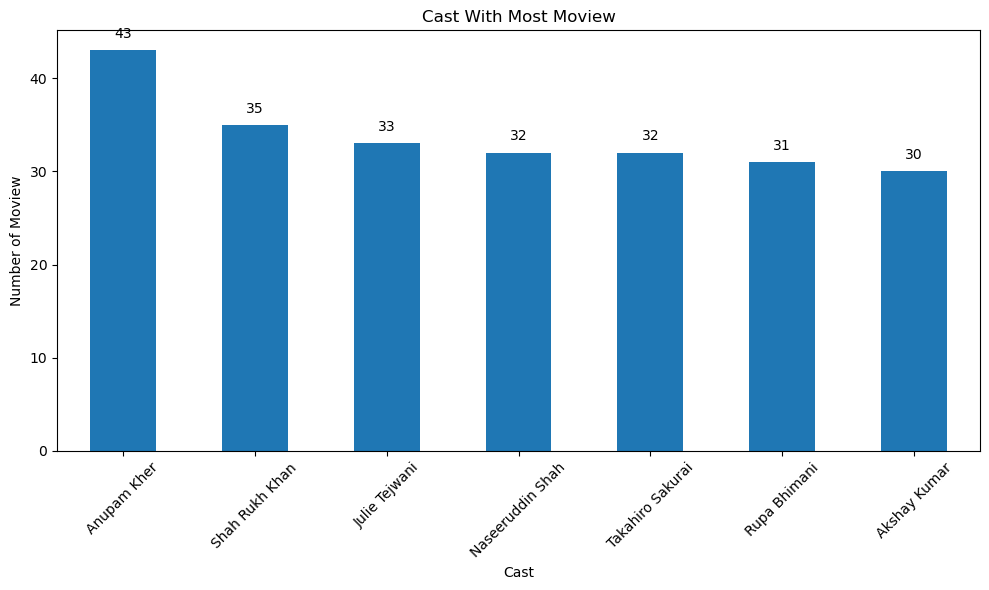

In [4]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt

# Declaration
# Exploratory Data Analysis (EDA) - Cast With Most Moview 
df = pd.read_csv("netflix_titles.csv")

# Dataset
country_list = df['cast'].dropna().str.split(', ')
country_counts = pd.Series([country for sublist in country_list for country in sublist])
top_context = country_counts.value_counts().head(7)
    
# Bar Chart
plt.figure(figsize=(10, 6))
ax = top_context.plot(kind='bar')
# Add label
for i, value in enumerate(top_context):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.title("Cast With Most Moview")
plt.xlabel("Cast")
plt.ylabel("Number of Moview")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

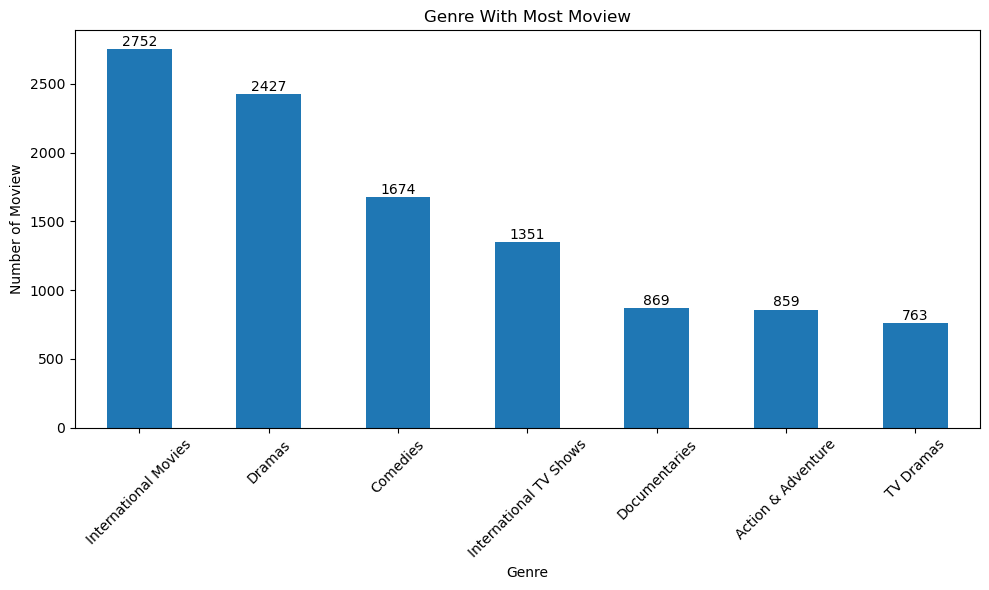

In [4]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt

# Declaration
# Exploratory Data Analysis (EDA) - Genre With Most Moview 
df = pd.read_csv("netflix_titles.csv")

# Dataset
country_list = df['listed_in'].dropna().str.split(', ')
country_counts = pd.Series([country for sublist in country_list for country in sublist])
top_context = country_counts.value_counts().head(7)
    
# Bar Chart
plt.figure(figsize=(10, 6))
ax = top_context.plot(kind='bar')
# Add label
for i, value in enumerate(top_context):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.title("Genre With Most Moview")
plt.xlabel("Genre")
plt.ylabel("Number of Moview")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

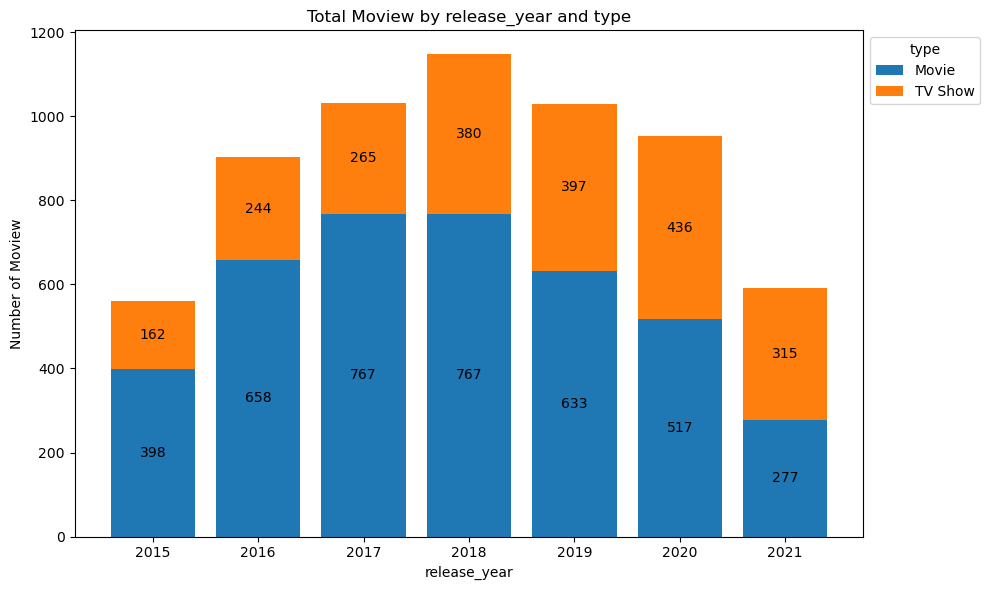

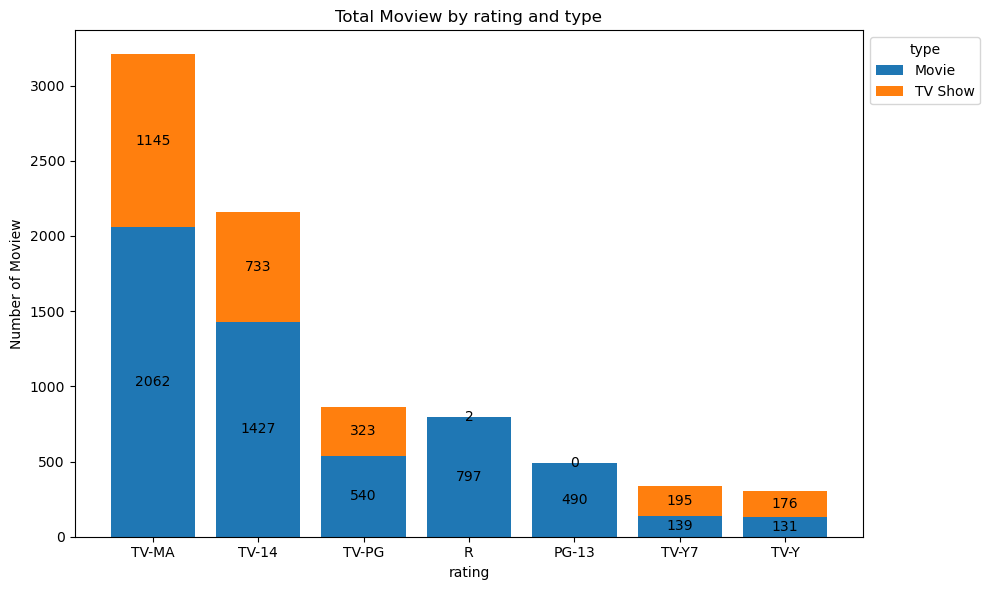

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("netflix_titles.csv")

# Exploratory Data Analysis (EDA) - Stacked Bar Chart Most Context and Grouping for Nonconditional Data
target_col = [
    { 'count_col' : 'release_year', 'group_col' : 'type' },
    { 'count_col' : 'rating', 'group_col' : 'type' },
]

for dt in target_col:
    count_col = dt['count_col']
    group_col = dt['group_col']
    
    # Dataset
    context_group_counts = df.groupby([count_col, group_col]).size().reset_index(name='Count')
    stacked_data = context_group_counts.pivot(index=count_col, columns=group_col, values='Count').fillna(0)
    
    # Ordering
    stacked_data['Total'] = stacked_data.sum(axis=1)
    stacked_data = stacked_data.sort_values(by='Total', ascending=False).head(7)
    categories = stacked_data.columns[:-1] 
    counts = stacked_data[categories].values 
    
    # Plotting
    context = stacked_data.index
    fig, ax = plt.subplots(figsize=(10, 6))
    bottom = np.zeros(len(context))
    
    # Plot each group_col as stack
    for group_col_index, group in enumerate(categories):
        p = ax.bar(context, counts[:, group_col_index], label=group, bottom=bottom)
        bottom += counts[:, group_col_index]
        ax.bar_label(p, label_type='center', fmt='%d')
    
    # Customizing the plot
    ax.set_title(f'Total Moview by {count_col} and {group_col}')
    ax.set_xlabel(count_col)
    ax.set_ylabel('Number of Moview')
    ax.legend(title=group_col, bbox_to_anchor=(1, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    print("\n")